In [210]:
###### valido para Julia 1.7.2
using LinearAlgebra
using Plots
using Graphs #paquetería para graphos
using Random
using GraphPlot #paqueteria para graficar redes
using SparseArrays
using LaTeXStrings

In [211]:
fnt = Plots.font("sans-serif", 15) # Para gráficar loas labels


Plots.Font("sans-serif", 15, :hcenter, :vcenter, 0.0, RGB{N0f8}(0.0,0.0,0.0))

In [212]:
F(theta,i,j,k)=exp(im*theta*i*j/k) #son las entradas de la matriz, las exponenciales

function Coin_Fourier(k,theta=2*pi)   #genera la matriz
    
    Cki=zeros(Complex,k,k)

    
    Cki[1,:].=1                # se le agrega 1's a la primera fila
    Cki[:,1].=1                # se le agrega 1's a la primera columna
    for i=1:k-1                #  En este for se va a recorrer cada fila y columna
        for j=1:k-1               ## junto con este otro for
            Cki[j+1,i+1]=F(theta,i,j,k) # se utiliza la función F que se definio arriba
        end
    end
    
    if k==2
        
        ###Este es un parche para un anillo##
        C=zeros(2,2)
        C[1,1]=0
        C[1,2]=1
        C[2,1]=1
        C[2,2]=0
        ######################################
       return (1/sqrt(k))*(Cki*C)  # se le multiplica por el 1/sqrt(grado) al que corresponde 
    else
       return (1/sqrt(k))*(Cki) 
    end
end


## Neceisto algo que si le doy un nodo me diga que base se le asigna###
function Base_del_Nodo(Nodo,A)
    k=sum(A[Nodo,:]) # Sumamos cada entrada eso nos dará el grado del nodo
    Id=Matrix(1I, k, k) # generamos la matriz identidad que corresponde al grado
    return Id #La retorna
              ## Esto genera la base segun sea el grado de cada nodo
end

Base_del_Nodo (generic function with 1 method)

In [213]:
function U_evolution(n,A,ψ)

    ### Para ver que vectores hay tenemos que recorrer cada uno... PARA UNA MATRIZ ψ DADA
    for t=1:n
        for i=1:size(A)[1]   #PAra un nodo i me va a dar el vector que le corresponde Ö

            if rowvals(ψ[i,:])==[]       # si no hay ningún peso entonces continua
               continue 
            else
               #println(ψ[i,:]) 
            end

            Nodos_de_i=rowvals(A[i,:])   # vecinos del nodo i
            Basis=Base_del_Nodo(i,A)     # base del nodo i


            v=zeros(length(Nodos_de_i)) # el vector del nodo i
            for (index,value) in enumerate(Nodos_de_i)   # hacemos dos indices uno que enlista los elemntos y otro los nodos conectados al nodos i
            v+=Basis[:,index]*ψ[i,value]
            end


            #Al vector le aplicamos el operador moenda
            k=sum(A[i,:])  # calculamos
            v=Coin_Fourier(k)*v  ## El vector despues de la moenda de Fourier 


            ## Hay que reemplazar los pesos (SEGUIMOS EN EL NODO 1)
            for (index,value) in enumerate(Nodos_de_i)   # hacemos dos indices uno que enlista los elemntos y otro los nodos conectados al nodos 1
                ψ[i,value]=v[index]
            end
        end
        ### operador S### es solo el trasnpuesto de la matriz ψ
        ψ=sparse(transpose(ψ))
    end
    return ψ
end

U_evolution (generic function with 1 method)

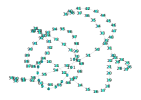

In [222]:
#Red de prueba
NODOS=101
g = SimpleGraph(NODOS)  #defeinimos nodos de 1 al 3

for i=1:NODOS-1
   add_edge!(g,i,i+1)  
end
add_edge!(g,NODOS,1)

#add_edge!(g,1,50)

gplot(g, nodelabel=1:NODOS)   #graficamos la red

In [223]:
A=adjacency_matrix(g)

101×101 SparseMatrixCSC{Int64, Int64} with 202 stored entries:
⠪⡦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈
⠀⠈⠪⡦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠈⠺⡢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠈⠺⡢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠈⠺⡢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠺⡢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠫⡢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠫⡢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠫⡢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠫⣢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠪⣢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠪⣢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠪⣢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠪⣢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠪⡦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠪⡦⡀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠪⡦⡀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠪⡦⡀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠺⡢⡀⠀
⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠺⡢

In [224]:
Nd_central=Int64((NODOS-1)/2 +1)

51

In [225]:
ψ=sparse(zeros(Complex,size(A))) ## Creo la matriz de coeficientes psi

## Creamos un estado 
ψ[Nd_central,Nd_central+1]=1/sqrt(2) * 1     
ψ[Nd_central,Nd_central-1]=1/sqrt(2) * 1*im 

0.0 + 0.7071067811865475im

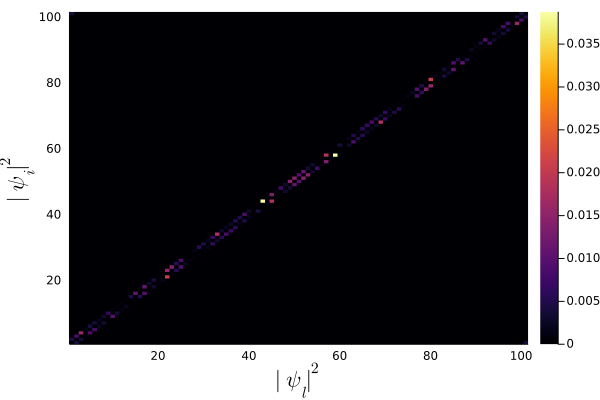

In [226]:

## matriz psi
# ψ=sparse(zeros(Complex,size(A)))

# ψ[1,2]=1/sqrt(2)
# ψ[1,4]=1/sqrt(2)
#ψ=sparse(zeros(Complex,size(A)))

# Norm=1/sqrt(sum(A))
# for i=1:size(A)[1]
#     ψ[i,:]=A[i,:]*Norm
# end

#ψ[52,51]=1/sqrt(2) * 1     ##El nodo que esta en el 52 y apunta al 51
#ψ[52,53]=1/sqrt(2) * 1*im  ## El nodo que esta en el 52 y apunta al 51

# Norm=1/sqrt(sum(A[1,:]))
# ψ[1,:]=A[1,:]*Norm


B=U_evolution(1000,A,ψ)
BB=abs2.(Matrix(B))
#BB[20,1]=0.05
plot(heatmap(BB),guidefont=fnt,xlabel=L"|\psi_l|^2",ylabel=L"|\psi_i|^2")

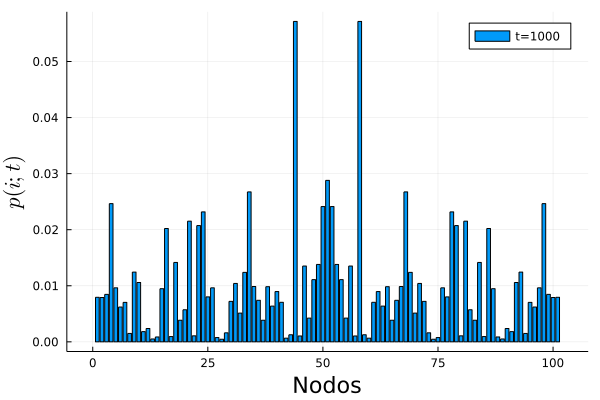

In [227]:
#JJ=30
pesos=zeros(size(A)[1])
for i=1:length(pesos)
    pesos[i]=sum(BB[i,:])
end
bar(pesos,guidefont=fnt,ylabel=L"p(i;t)",xlabel="Nodos",label="t=1000")

In [228]:

# anim= @animate for l=1:1:500
#     B=U_evolution(l,A,ψ)
#     BB=abs2.(Matrix(B))
#     #BB[20,1]=0.05
#     plot(heatmap(BB),guidefont=fnt,xlabel=L"|\psi_l|^2",ylabel=L"|\psi_i|^2",label="t=$l")
# end
# gif(anim,"./Target_initial.gif", fps=30)


┌ Info: Saved animation to 
│   fn = /home/sebas/Escritorio/Cosas de Git/Tesis_MAestria/quantum-walks-julia/Target_weihgt.gif
└ @ Plots /home/sebas/.julia/packages/Plots/lW9ll/src/animation.jl:137


Plots.AnimatedGif("/home/sebas/Escritorio/Cosas de Git/Tesis_MAestria/quantum-walks-julia/Target_weihgt.gif")
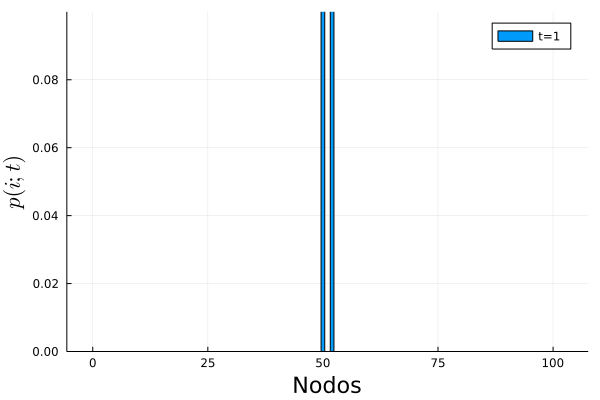

In [229]:

anim= @animate for l=1:1:500
    B=U_evolution(l,A,ψ)
    BB=abs2.(Matrix(B))
    pesos=zeros(size(A)[1])
    for i=1:length(pesos)
        pesos[i]=sum(BB[i,:])
    end
    bar(pesos,guidefont=fnt,ylabel=L"p(i;t)",xlabel="Nodos",label="t=$l",ylim=(0,0.1))
end
gif(anim,"./Target_weihgt.gif", fps=30)


# Matriz de densidad
Dos conjuntos de kets juntos

In [230]:
### Buscamos el grado más alto
grado_m=0
for i=1:NODOS
    if sum(A[i,:])>grado_m
        grado_m=sum(A[i,:])
    end
end

In [231]:
grado_m

2

In [199]:
B=U_evolution(680,A,ψ);


In [200]:
Nodo_1=1
Nodo_2=36

36

In [201]:
#### COnstruir el vector del espacio de hilbert de la región con los dos nodos con quiralidades diferentes
dim_N1=length(rowvals(B[Nodo_1,:])) #DEfinimos la dimensión del espacio del Nodo1 con quiralidad
dim_N2=length(rowvals(B[Nodo_2,:])) #DEfinimos la dimensión del espacio del Nodo2 con quiralidad

state=Array{Complex}(undef, dim_N1+dim_N2) # DEfinimos un vector para colocar los estados

if Nodo_1<Nodo_2 ## si el nodo1 tienen un indice menor que el nodo 2: el nodo 1 irá primero en orden
    
    ## se colocan los valores no ceros
    for i=1:dim_N1         
        state[i]=nonzeros(B[Nodo_1,:])[i]
    end 
    for i=dim_N1+1:dim_N1+dim_N2
        state[i]=nonzeros(B[Nodo_2,:])[i-dim_N1]
    end
else            ## si el nodo1 tienen un indice mayor que el nodo 2: el nodo 2 irá primero en orden
    
    ## se colocan los valores no ceros
    for i=1:dim_N2
        state[i]=nonzeros(B[Nodo_2,:])[i]
    end 
    for i=dim_N2+1:dim_N1+dim_N2
        state[i]=nonzeros(B[Nodo_1,:])[i-dim_N2]
    end
end

Norm=1/sqrt(sum(abs2.(state))) #renormalizamos
state=Norm*state #Es el estado renormalizado
Dst=state * state'

5×5 Matrix{ComplexF64}:
    0.28542+0.0im        0.0890245+0.279062im   …  -0.0569299-0.22847im
  0.0890245-0.279062im    0.300613+0.0im            -0.241137-0.0155996im
   -0.21778+0.0779103im  -0.144102-0.188627im        0.105803+0.158786im
  0.0728306-0.0625529im  0.0838758+0.0516975im     -0.0645984-0.0458218im
 -0.0569299+0.22847im    -0.241137+0.0155996im       0.194238+0.0im

In [202]:
tr(Dst*Dst)

1.0000000000000009 + 0.0im

In [203]:
eigvals(Dst)

5-element Vector{Float64}:
 -1.1480252868028023e-16
 -1.5663870654644845e-17
  2.932669009882963e-17
  8.379411561345498e-17
  1.0000000000000002